In [5]:
# Setup.
import pandas as pd
import requests
import json
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import itertools 
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib

def get_race_result(season_number, year ):
    api = 'http://ergast.com/api/f1/{}/{}/qualifying.json'.format(year, season_number)
    data = requests.get(api).json()
    temp_df =  pd.DataFrame.from_records(data.get('MRData').get('RaceTable').get('Races')[0].get('QualifyingResults'))
    temp_df['seasonNbr'] = season_number
    temp_df['year'] = year
    return temp_df

results = []
seasons = np.arange(2003,2018,1) #2018
rounds = np.arange(1,15,1) #15

for s in seasons:
    for r in rounds:
        result = get_race_result(r, s)
        results.append(result)

qualifying = pd.concat(results, axis=0)
qualifying['driver_id'] = qualifying.Driver.map(lambda x: x.get('driverId'))
qualifying['car_make'] = qualifying.Constructor.map(lambda x: x.get('name'))
qualifying['driver_nat'] = qualifying.Driver.map(lambda x: x.get('nationality'))

results = []
seasons = np.arange(2003,2018,1) #2018
rounds = np.arange(1,15,1) #15

for s in seasons:
    for r in rounds:
        result = get_race_result(r, s)
        results.append(result)
        
def get_race_result(season_number, year ):
    api = 'http://ergast.com/api/f1/{}/{}/results.json'.format(year, season_number)
    data = requests.get(api).json()
                                         #resp.get('MRData').get('RaceTable').get('Races')[0].get('Results')
    temp_df =  pd.DataFrame.from_records(data.get('MRData').get('RaceTable').get('Races')[0].get('Results'))
    circuit=data.get('MRData').get('RaceTable').get('Races')[0].get('Circuit')
    temp_df['circuit_name']=circuit.get('circuitName')
    temp_df['seasonNbr'] = season_number
    temp_df['year'] = year
    return temp_df

results = []
seasons = np.arange(2003,2018,1) #2018
rounds = np.arange(1,15,1) #15

for s in seasons:
    for r in rounds:
        result = get_race_result(r, s)
        results.append(result)

out = pd.concat(results, axis=0)
out['driver_id'] = out.Driver.map(lambda x: x.get('driverId'))
out['car_make'] = out.Constructor.map(lambda x: x.get('name'))
out['driver_nat'] = out.Driver.map(lambda x: x.get('nationality'))

results = out
results['points'] = results['points'].astype(float)

# Create combined dataframe of car make, year, position, qualifying counts and results counts.
# Summarize qualifying race results by car, year, and position.
qualifying_car_makes = qualifying.groupby(['car_make','year','position']).size().reset_index()
qualifying_car_makes.rename(columns={0:'qualifying_count'}, inplace = True)

# Summarize race results by car, year, and position.
results_car_makes = results.groupby(['car_make','year','position']).size().reset_index()
results_car_makes.rename(columns={0:'results_count'}, inplace = True)

# Combine the qualifying results counts and race results counts together.
car_make_df = pd.merge(qualifying_car_makes, results_car_makes, on = ['car_make','year','position'])
car_make_df['total_count'] = car_make_df['qualifying_count'] + car_make_df['results_count']

#  Create subset of dataframe for purposes of stacked bar chart.
df2 = car_make_df[['car_make','results_count','position']].groupby(['car_make','position']).sum().reset_index()

df2

,car_make,position,results_count
0,BAR,10,4
1,BAR,11,2
2,BAR,12,3
3,BAR,13,2
4,BAR,14,4
5,BAR,15,3
6,BAR,16,1
7,BAR,17,4
8,BAR,19,2
9,BAR,2,3


In [2]:
 df2 = car_make_df[['car_make','results_count','position']].groupby(['car_make','position']).sum().reset_index()

def mult(row):
    return row["results_count"]*row[col]

df3 = pd.get_dummies(df2,columns=["car_make"], dtype=int)

for col in list(df3.columns)[2:]:
    df3[col] = df3.apply(mult,axis=1)
    
df3

# What I don't get is why only the first column `car_make_BAR` has values in it.
# There should be numbers scattered throughout the rest of the car columns.
# What we're doing here is taking the `results_count` and multiplying that by the value 
# in the `car_make_%` column (it's 1 or 0).

,position,results_count,car_make_BAR,car_make_BMW Sauber,car_make_Brawn,car_make_Caterham,car_make_Ferrari,car_make_Force India,car_make_HRT,car_make_Haas F1 Team,...,car_make_Minardi,car_make_Red Bull,car_make_Renault,car_make_Sauber,car_make_Spyker,car_make_Super Aguri,car_make_Toro Rosso,car_make_Toyota,car_make_Virgin,car_make_Williams
0,10,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,15,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,16,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,17,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,19,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


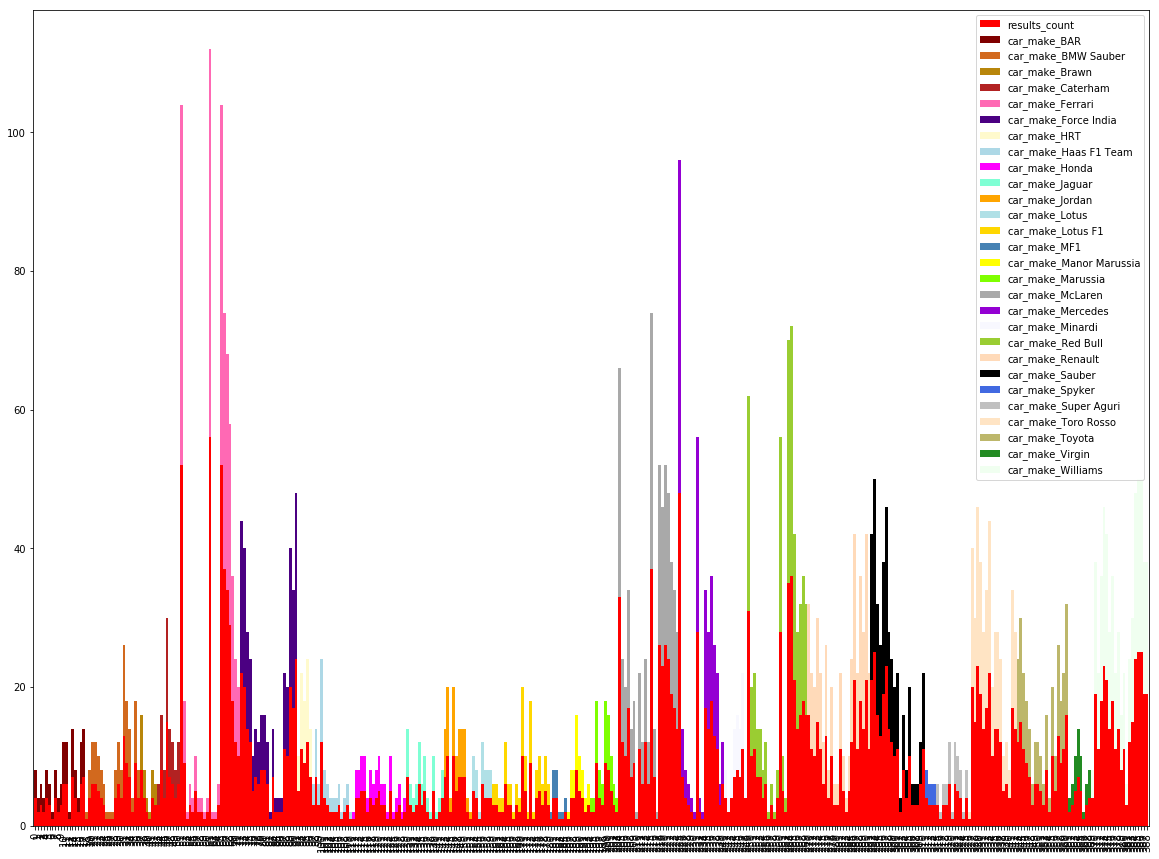

In [4]:
colors = ['#FF0000', '#800000', '#D2691E', '#B8860B', '#B22222',
         '#FF69B4', '#4B0082', '#FFFACD', '#ADD8E6', '#FF00FF',
         '#7FFFD4', '#FFA500', '#B0E0E6', '#FFD700', '#4682B4',
         '#FFFF00', '#7FFF00', '#A9A9A9', '#9400D3', '#F8F8FF',
         '#9ACD32', '#FFDAB9', '#000000', '#4169E1', '#C0C0C0',
         '#FFE4C4', '#BDB76B', '#228B22', '#F0FFF0', '#CD853F',]
df3.plot.bar(stacked=True, color=colors, width = 1, figsize=(20,15))

# plt.title("Total Points per Age per Country of Origin")
# plt.xlabel("Nationality of Drivers")
# plt.ylabel("Total Points Accrued (2003-2018)")
# plt.savefig("../Images/points_per_age.png")